In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ex 2

In [15]:
class PCA:
    def __init__(self, n_dimension):
        self.n_dimension = n_dimension
    
    def fit_transform(self, X):
        mean = np.mean(X, axis=0)
        X = X - mean
        cov = X.T.dot(X) / X.shape[0] 
        
        eigen_values, eigen_vectors, = np.linalg.eig(cov)
        sorted_index = np.argsort(eigen_values)[::-1][:self.n_dimension]
        
        U = eigen_vectors[:, sorted_index]
        X_new = X.dot(U)
        return X_new

### Ex 3

In [3]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


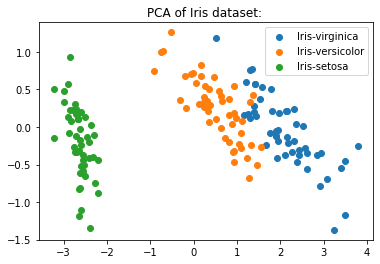

In [4]:
if __name__ == "__main__":
    iris = iris
    X = iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].to_numpy()
    Y = iris["Species"].to_numpy()
    
    pca = PCA(2)
    new_X = pca.fit_transform(X)
    
    for label in set(Y):
        X_class = new_X[Y == label]
        plt.scatter(X_class[:, 0], X_class[:, 1], label = label)
        
    plt.title('PCA of Iris dataset: ')
    plt.legend()

In [17]:
sum_explained_variance = sum(pca.eigenvalues())
sum_explained_variance
explained_variance = []
for i in pca.eigenvalues():
    explained_variance.append(eigen_value/sum_explained_variance * 100)

AttributeError: 'PCA' object has no attribute 'eigenvalues'

### Ex 4

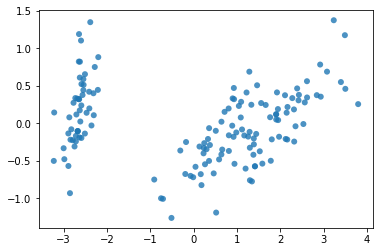

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X)

plt.scatter(components[:, 0], components[:, 1], edgecolor="none", alpha=0.8)
plt.show()